# Extract - Cleaning Data

In [21]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

### CSV Project Data 

In [99]:
project_data = pd.read_csv("ekstrakdata/projects_data.csv", dtype={44: str})
project_data.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [100]:
# drop columns 'unnamed: 56'
project_data = project_data.drop(columns=['Unnamed: 56'])
project_data.head() 

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG


In [101]:
# check data types
project_data.dtypes

id                           object
regionname                   object
countryname                  object
prodline                     object
lendinginstr                 object
lendinginstrtype             object
envassesmentcategorycode     object
supplementprojectflg         object
productlinetype              object
projectstatusdisplay         object
status                       object
project_name                 object
boardapprovaldate            object
board_approval_month         object
closingdate                  object
lendprojectcost              object
ibrdcommamt                  object
idacommamt                   object
totalamt                     object
grantamt                     object
borrower                     object
impagency                    object
url                          object
projectdoc                  float64
majorsector_percent         float64
sector1                      object
sector2                      object
sector3                     

In [102]:
# convert data type to datetime 
project_data['boardapprovaldate'] = pd.to_datetime(project_data['boardapprovaldate'])
project_data['closingdate'] = pd.to_datetime(project_data['closingdate'])

# convert data type to float
float_cols = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']
project_data[float_cols] = project_data[float_cols].replace('[\$,]', '', regex=True).astype(float)

# check the data type
project_data.dtypes

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19900\3740407593.py:7: SyntaxWarning: invalid escape sequence '\$'
  project_data[float_cols] = project_data[float_cols].replace('[\$,]', '', regex=True).astype(float)


id                                       object
regionname                               object
countryname                              object
prodline                                 object
lendinginstr                             object
lendinginstrtype                         object
envassesmentcategorycode                 object
supplementprojectflg                     object
productlinetype                          object
projectstatusdisplay                     object
status                                   object
project_name                             object
boardapprovaldate           datetime64[ns, UTC]
board_approval_month                     object
closingdate                 datetime64[ns, UTC]
lendprojectcost                         float64
ibrdcommamt                             float64
idacommamt                              float64
totalamt                                float64
grantamt                                float64
borrower                                

In [103]:
#check missing values
project_data.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

In [108]:
# drop columns with more than 80% missing values 'NaN'
project_data = project_data.dropna(thresh=0.8*len(project_data), axis=1)
project_data.isnull().sum()

id                         0
regionname                 0
countryname                0
prodline                   0
lendinginstr             246
lendinginstrtype         246
supplementprojectflg      53
productlinetype            0
projectstatusdisplay       4
status                     4
project_name               0
boardapprovaldate       1504
board_approval_month    1504
closingdate             3349
lendprojectcost          125
ibrdcommamt                0
idacommamt                 0
totalamt                   0
grantamt                   0
url                        0
sector1                    0
sector                   638
mjsector                 638
theme1                     0
dtype: int64

In [111]:
# handle missing values 'NaN' to '0' from sector, mjsector, boardapprovaldate, board_approval_month, closingdate, lendprojectcost, lendinginstr, lendinginstrtype, supplementprojectflg
project_data['sector'] = project_data['sector'].fillna('0')
project_data['mjsector'] = project_data['mjsector'].fillna('0')
project_data['boardapprovaldate'] = project_data['boardapprovaldate'].fillna('0')
project_data['board_approval_month'] = project_data['board_approval_month'].fillna('0')
project_data['closingdate'] = project_data['closingdate'].fillna('0')
project_data['lendprojectcost'] = project_data['lendprojectcost'].fillna('0')
project_data['lendinginstr'] = project_data['lendinginstr'].fillna('0')
project_data['lendinginstrtype'] = project_data['lendinginstrtype'].fillna('0')
project_data['supplementprojectflg'] = project_data['supplementprojectflg'].fillna('0')
project_data.isnull().sum()

id                      0
regionname              0
countryname             0
prodline                0
lendinginstr            0
lendinginstrtype        0
supplementprojectflg    0
productlinetype         0
projectstatusdisplay    4
status                  4
project_name            0
boardapprovaldate       0
board_approval_month    0
closingdate             0
lendprojectcost         0
ibrdcommamt             0
idacommamt              0
totalamt                0
grantamt                0
url                     0
sector1                 0
sector                  0
mjsector                0
theme1                  0
dtype: int64

In [112]:
project_data.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1,sector,mjsector,theme1
0,P162228,Other,World;World,RE,Investment Project Financing,IN,N,L,Active,Active,...,500000.0,0.0,0.0,0.0,500000.0,http://projects.worldbank.org/P162228?lang=en,!$!0,0,0,!$!0
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,N,L,Active,Active,...,200000000.0,0.0,200000000.0,200000000.0,0.0,http://projects.worldbank.org/P163962?lang=en,!$!0,0,0,!$!0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,Y,L,Active,Active,...,50000000.0,0.0,58330000.0,58330000.0,0.0,http://projects.worldbank.org/P167672?lang=en,!$!0,0,0,!$!0
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,N,L,Active,Active,...,50000000.0,0.0,20000000.0,20000000.0,0.0,http://projects.worldbank.org/P158768?lang=en,!$!0,0,0,!$!0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,N,L,Active,Active,...,100000000.0,0.0,100000000.0,100000000.0,0.0,http://projects.worldbank.org/P161364?lang=en,Social Protection!$!63!$!SA,Social Protection;Social Protection;Other Indu...,Social Protection;Social Protection;Industry; ...,!$!0


### CSV Population Data

In [ ]:
population_data = pd.read_csv("ekstrakdata/population_data.csv")
population_data.head()

In [ ]:
# drop columns 'unnamed: 62'
population_data = population_data.drop('Unnamed: 62', axis=1)
population_data.head()

In [ ]:
# check missing values
population_data.isnull().sum()

In [ ]:
# check duplicate values
population_data.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
population_data[population_data.duplicated()]

### JSON Population Data

In [ ]:
population_json = pd.read_json("ekstrakdata/population_data.json")
population_json.head()

In [ ]:
# check data type
population_json.dtypes

In [ ]:
# drop missing values data 1960 - 2017
population_json = population_json.dropna(subset=population_json.columns[4:])
population_json.isnull().sum()

In [ ]:
# export the cleaned data utf-8 encoding
population_json.to_csv('datasets-cleaned/population_data_json_cleaned.csv', index=False, encoding='utf-8')

### XML Population

In [ ]:
# Read the XML file
with open("ekstrakdata/population_data.xml", "r") as f:
    xml_data = f.read()

# Parse XML using Beautiful Soup
soup = BeautifulSoup(xml_data, "html.parser")

# Extract data from XML and store in a list of dictionaries
data = []
for record in soup.find_all("record"):
    record_data = {}
    for field in record.find_all("field"):
        name = field.get("name")
        value = field.text
        record_data[name] = value
    data.append(record_data)

# Convert list of dictionaries into DataFrame
population_xml = pd.DataFrame(data)

print(population_xml.head())

In [ ]:
# check missing values
population_xml.isnull().sum()

In [ ]:
# Export the cleaned data to XML
population_xml.to_csv('datasets-cleaned/population_data_xml_cleaned.csv', index=False, encoding='utf-8')

### DB Population

In [ ]:
# Connect to SQLite database
conn = sqlite3.connect("ekstrakdata/population_data.db")
cursor = conn.cursor()

# Perform select query
query = "SELECT * FROM population_data"
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

pdb = pd.DataFrame(results)

print(pdb.head())

# Close connection
conn.close()

In [ ]:
# check missing values
pdb.isnull().sum()

In [ ]:
# check duplicate values
pdb.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
pdb[pdb.duplicated()]

### Extract from API

In [ ]:
# API endpoint
url = "https://api.worldbank.org/v2/countries/all/indicators/SP.POP.TOTL/?format=json&per_page=1000"

# Send GET request
response = requests.get(url)

# Check if request was successful (status code 200)
if response.status_code == 200:
    # Print the JSON response
    print(response.json())
else:
    print("Error:", response.status_code)

### CSV rural_population_percent

In [52]:
rural_population = pd.read_csv("ekstrakdata/rural_population_percent.csv")
rural_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [53]:
# check data type
rural_population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2014              float64
2015              float64
2016              float64
2017              float64
Unnamed: 62       float64
Length: 63, dtype: object

In [54]:
# check missing values
rural_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64

In [55]:
# drop columns 'Unnamed: 62'
rural_population = rural_population.drop('Unnamed: 62', axis=1)
rural_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


In [56]:
# handling missing values 'NaN' to '0'
rural_population = rural_population.fillna(0)
rural_population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [57]:
# check duplicate values
rural_population.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
rural_population[rural_population.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


In [58]:
# export the cleaned data utf-8 encoding
rural_population.to_csv('datasets-cleaned/rural_population_percent_cleaned.csv', index=False, encoding='utf-8')

### CSV electricity_access_percent

In [59]:
electricity_access = pd.read_csv("ekstrakdata/electricity_access_percent.csv")
electricity_access.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [60]:
# check data type
electricity_access.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [61]:
# handle missing values 'NaN' to 0
electricity_access = electricity_access.fillna(0)
electricity_access.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [62]:
# export the cleaned data utf-8 encoding
electricity_access.to_csv('datasets-cleaned/electricity_access_percent_cleaned.csv', index=False, encoding='utf-8')

### CSV GDP DATA

In [38]:
gdp_data = pd.read_csv("ekstrakdata/gdp_data.csv")
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [39]:
# drop columns 'Unnamed: 62'
gdp_data = gdp_data.drop('Unnamed: 62', axis=1)
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [40]:
# check missing values
gdp_data.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

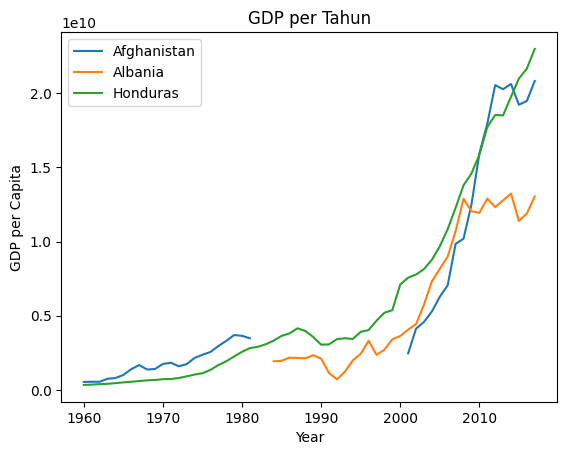

In [41]:
# show data before for Afganistan, Albania, and Honduras
countries = ['Afghanistan', 'Albania', 'Honduras']
data_countries = gdp_data[gdp_data['Country Name'].isin(countries)]

# plot the data
for country in countries:
    country_data = data_countries[data_countries['Country Name'] == country]
    year = country_data.columns[4:].astype(int)
    plt.plot(year, country_data.iloc[:, 4:].values.flatten(), label=country)

plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Tahun')
plt.legend()
plt.xticks(range(1960, 2011, 10))
plt.show()

In [42]:
# handling missing values with simpleimputer using median strategy
imputer = SimpleImputer(strategy='median')
gdp_data_imputed = pd.DataFrame(imputer.fit_transform(gdp_data.iloc[:, 4:]))

gdp_data_imputed.insert(0, 'Country Name', gdp_data['Country Name'])
gdp_data_imputed.insert(1, 'Country Code', gdp_data['Country Code'])

gdp_data_imputed.columns = ['Country Name', 'Country Code'] + [str(year) for year in range(1960, 2018)]

gdp_data.update(gdp_data_imputed)
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,5.038845e+10,5.447389e+10,5.673199e+10,5.317434e+10,5.324089e+10,5.944777e+10
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1.988240e+09,2.074604e+09,2.174966e+09,2.510127e+09,2.766609e+09,2.784309e+09,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


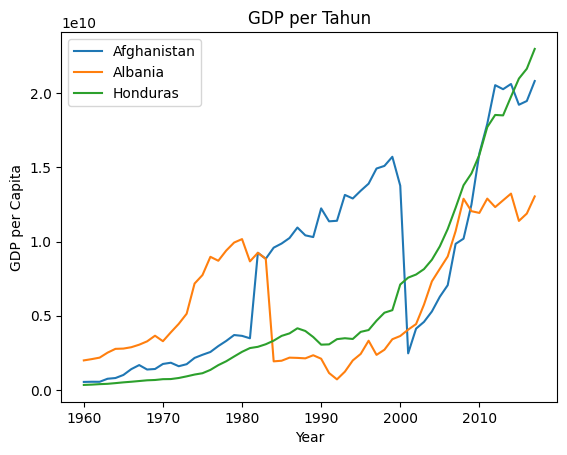

In [43]:
# show updated data for Afganistan, Albania, and Honduras after handling missing values
data_countries = gdp_data[gdp_data['Country Name'].isin(countries)]

for country in countries:
    country_data = data_countries[data_countries['Country Name'] == country]
    year = country_data.columns[4:].astype(int)
    plt.plot(year, country_data.iloc[:, 4:].values.flatten(), label=country)

plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Tahun')
plt.legend()
plt.xticks(range(1960, 2011, 10))
plt.show()

In [44]:
# duplicate values 
gdp_data.duplicated().sum()

# show the data that has duplicate values
print("Data with duplicate values:")
gdp_data[gdp_data.duplicated()]

Data with duplicate values:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017


In [45]:
# export the cleaned data utf-16 encoding
gdp_data.to_csv('datasets-cleaned/gdp_data_cleaned.csv', index=False, encoding='utf-16')

### CSV mystery

In [64]:
mystery_data = pd.read_csv("ekstrakdata/mystery.csv")
mystery_data.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [65]:
# check missing values
mystery_data.isnull().sum()

Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64

In [67]:
# drop columns 'Unnamed: 0'
mystery_data = mystery_data.drop('Unnamed: 0', axis=1)
mystery_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [68]:
# handle missing values 1960 - 2017 with mean
mystery_data[mystery_data.columns[4:]] = mystery_data[mystery_data.columns[4:]].fillna(mystery_data[mystery_data.columns[4:]].mean())
mystery_data.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

In [69]:
# export the cleaned data utf-16 encoding
mystery_data.to_csv('datasets-cleaned/mystery_cleaned.csv', index=False, encoding='utf-16')

#### 1. Kombinasikan data dari rural_population_percent.csv dan electricity_access_percent.csv yang merupakan data populasi pedesaan dan akses listrik dari berbagai negara. dan kemudian gabungkan menggunakan pandas.

In [72]:
rural_cleaned = pd.read_csv("datasets-cleaned/rural_population_percent_cleaned.csv")
electricity_cleaned = pd.read_csv("datasets-cleaned/electricity_access_percent_cleaned.csv")

# merge the data rural_cleaned and electricity_cleaned
rural_electricity = pd.merge(rural_cleaned, electricity_cleaned, on=['Country Name', 'Country Code'], how='inner')

# rename columns year_x to year_rural and year_y to year_electricity
for year in range(1960, 2018):
    rural_electricity.rename(columns={str(year) + "_x": str(year) + "_rural", str(year) + "_y": str(year) + "_electricity"}, inplace=True)

# export the combined data to csv
rural_electricity.to_csv("combined_data.csv", index=False, index_label=["Country Name", "Country Code", "Rural Population Indicator Name", "Rural Population Indicator Code"] + [str(year) + "_rural" for year in range(1960, 2018)] + ["Electricity Access Indicator Name", "Electricity Access Indicator Code"] + [str(year) + "_electricity" for year in range(1960, 2018)])
rural_electricity.head()

,Country Name,Country Code,Rural Population Indicator Name,Rural Population Indicator Code,1960_rural,1961_rural,1962_rural,1963_rural,1964_rural,1965_rural,...,2008_electricity,2009_electricity,2010_electricity,2011_electricity,2012_electricity,2013_electricity,2014_electricity,2015_electricity,2016_electricity,2017_electricity
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


#### 2. Dummy Variables untuk dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan fungsi get_dummies() untuk membuat dummy variables pada dataset ini. tapi ingat tidak perlu untuk membuat dummy variables pada semua kolom, cukup pada kolom yang memiliki data kategorikal saja.

In [79]:
project_data_cleaned = pd.read_csv("datasets-cleaned/projects_data_cleaned.csv")
project_data_cleaned.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,borrower,impagency,url
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,June,2018-12-31 00:00:00+00:00,500000.0,0.0,0.0,0.0,500000.0,EET,IIST,http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,June,2023-12-31 00:00:00+00:00,200000000.0,0.0,200000000.0,200000000.0,0.0,EET,IIST,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,B,Y,L,Active,...,June,2018-12-31 00:00:00+00:00,50000000.0,0.0,58330000.0,58330000.0,0.0,EET,IIST,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,June,2023-06-28 00:00:00+00:00,50000000.0,0.0,20000000.0,20000000.0,0.0,IIST,IIST,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,June,2023-05-31 00:00:00+00:00,100000000.0,0.0,100000000.0,100000000.0,0.0,EET,IIST,http://projects.worldbank.org/P161364?lang=en


In [ ]:
# show data columns 'status' and 'lendinginstrtype'
project_data_cleaned[['status', 'lendinginstrtype']]

,status,lendinginstrtype
0,Active,IN
1,Active,IN
2,Active,IN
3,Active,IN
4,Active,IN
...,...,...
18186,Closed,IN
18187,Closed,AD
18188,Closed,AD
18189,Closed,AD
